# วิธีการสร้าง Torch tensor เเบบต่าง ๆ

In [2]:
import numpy as np
import torch

การสร้างเเบบที่ใช้ array ของ Python ในการสร้าง

In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


การสร้างเเบบที่สามารถใช้ Numpy array เป็นต้นเเบบเพื่อที่จะสร้าง tensor ที่มีค่าเเบบเดียวกันได้

In [4]:
import numpy as np
import torch

data = [[5, 6], [7, 8]]
np_array = np.array(data)
print("Numpy array :\n", np_array)
x_np = torch.from_numpy(np_array)
print("Torch tensor :\n", x_np)

Numpy array :
 [[5 6]
 [7 8]]
Torch tensor :
 tensor([[5, 6],
        [7, 8]])


การสร้าง tensor เเบบที่กำหนดรูปร่าง (shape) ให้คล้ายกับ tensor ตัวอย่าง x_data

In [5]:
x_ones = torch.ones_like(x_data) # retains the shape of x_data and fill all the value with 1
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # retains the shape of x_data and fill all the value with random float number in range of 0 to 1
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0143, 0.7241],
        [0.4084, 0.6321]]) 



การสร้าง tensor เเบบที่กำหนดรูปร่าง (shape) ได้

In [6]:
shape = (2, 3, ) # (ROW, COLUMN, DEPTH, ...)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2661, 0.6309, 0.1168],
        [0.3400, 0.3966, 0.9115]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


หรือสามารถส่งผ่าน shape ที่ต้องการผ่าน args โดยตรง

In [7]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# ข้อเเตกต่างระหว่าง Torch tensor กับ Numpy array

Torch tensor มีข้อเเตกต่างจาก Numpy array ตรงที่ Numpy array นั้นเวลาที่จะประมวลผลจำเป็นต้องใช้ CPU เท่านั้นในขณะที่ Torch tensor สามารถประมวลผลผ่าน GPU
ด้วย CUDA เพื่อที่จะเร่งความเร็วในการประมวลผลได้

** ref [https://youtu.be/au70jR4DKDA?si=bev1Cv1cj7d-hQG4]

In [8]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

การคูณ $2^2$ ใน Numpy array

In [9]:
A = np.array([[1,2], [3,4], [5,6], [7,8], [9,10]])
for i in range(2):
  A *= 2
print(A)

[[ 4  8]
 [12 16]
 [20 24]
 [28 32]
 [36 40]]


In [10]:
T = torch.tensor([[1,2], [3,4], [5,6], [7,8], [9,10]])
T.mul(2**2)

tensor([[ 4,  8],
        [12, 16],
        [20, 24],
        [28, 32],
        [36, 40]])

# การเเก้ไข tensor

นอกจากนั้นเเล้ว tensor ยังเสนอวิธีต่างๆในการเเก้ไขที่ง่ายต่อการใช้งานอีกด้วย

In [11]:
print(tensor, "\n")
tensor.add_(5) # add 5 to the entire tensor
print(tensor)

tensor([[0.8922, 0.4411, 0.9409, 0.5601],
        [0.0913, 0.5198, 0.4823, 0.6548],
        [0.7449, 0.8481, 0.0937, 0.5777]]) 

tensor([[5.8922, 5.4411, 5.9409, 5.5601],
        [5.0913, 5.5198, 5.4823, 5.6548],
        [5.7449, 5.8481, 5.0937, 5.5777]])


In [12]:
tensor = torch.ones(4, 4)
tensor[2,3] = 0 # set value for specific point in tensor
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]])


การเชื่อมเทนเซอร์ (Concatenation)
\
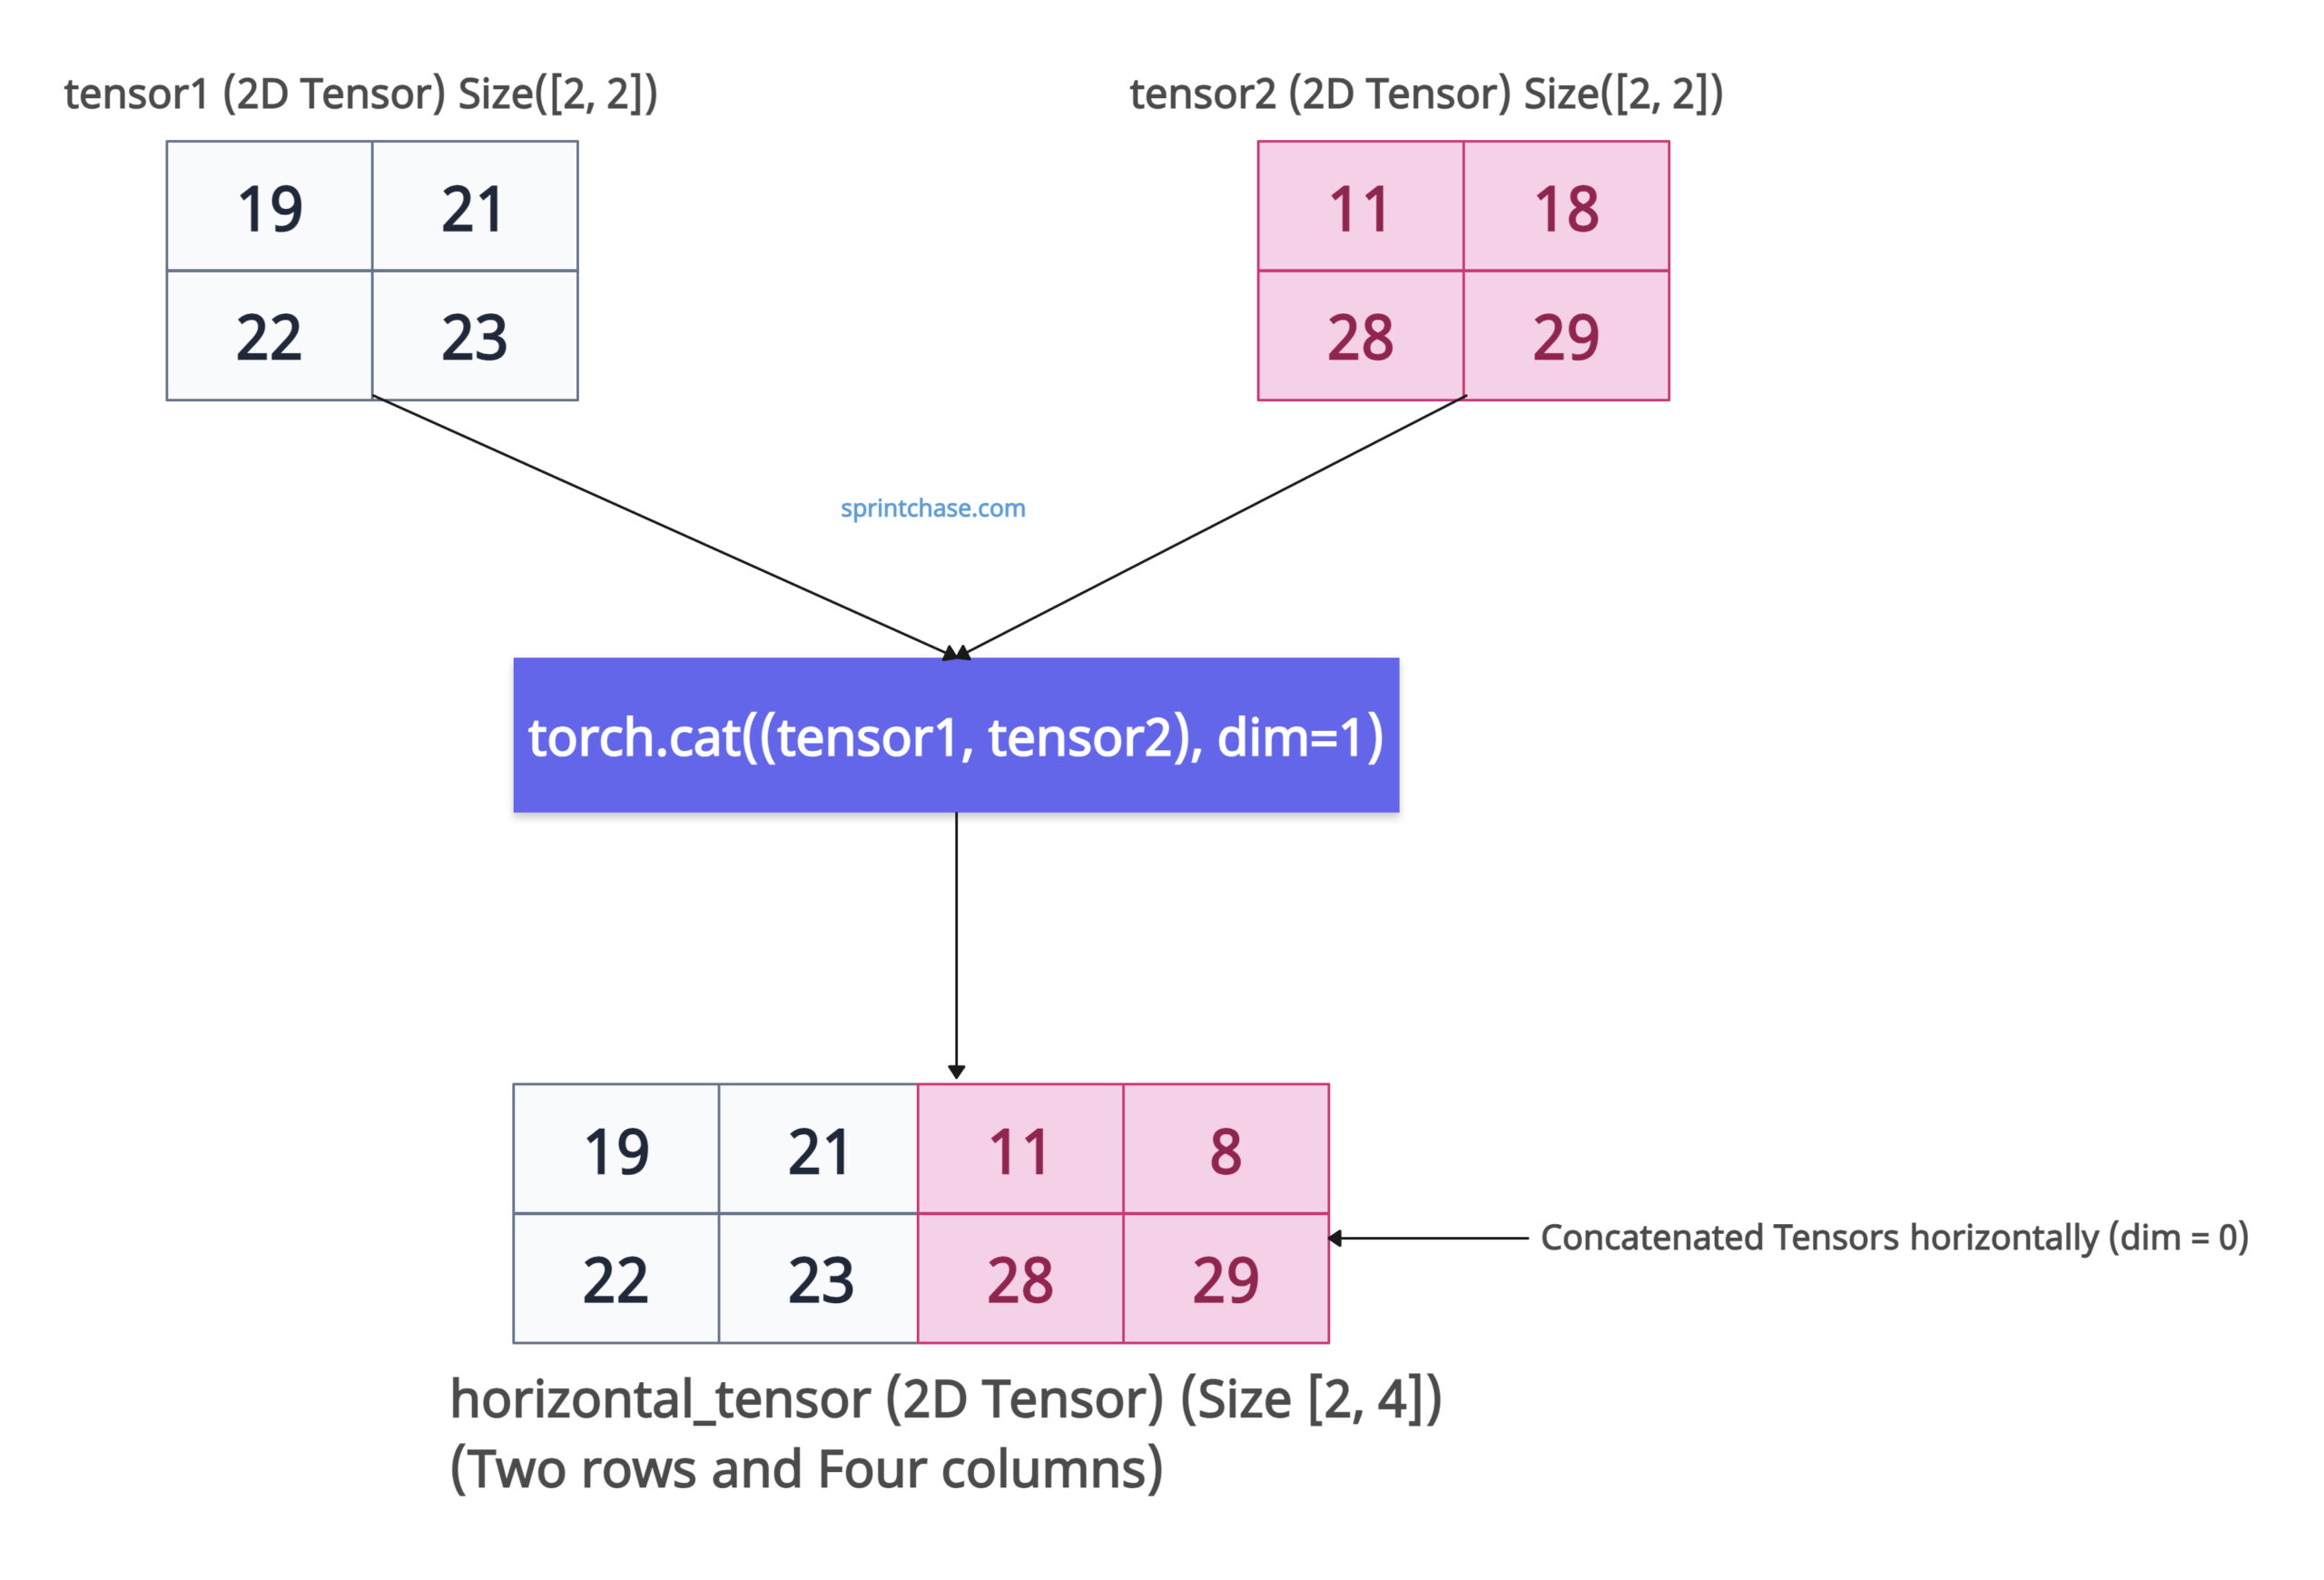

In [13]:
tensor = torch.ones(4, 4)
tensor[2,3] = 0
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print("Row concat : \n",t1)
t2 = torch.cat([tensor, tensor, tensor], dim=1)
print("Column concat : \n", t2)

Row concat : 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]])
Column concat : 
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


การบีบ (Squeeze) และคลายออก (Unsqueeze)

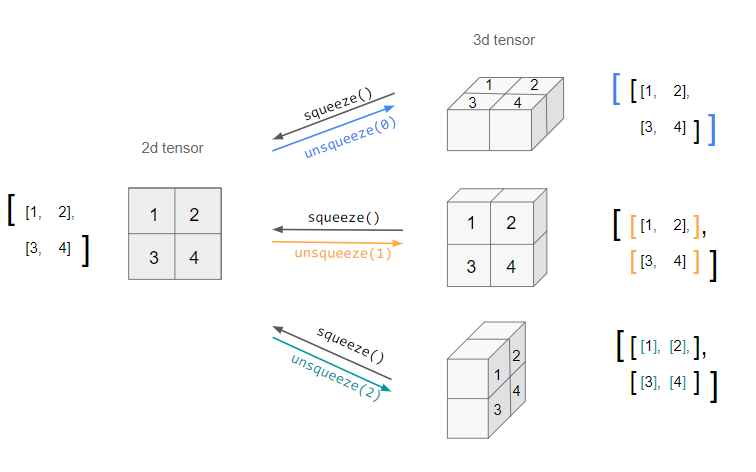

In [14]:
# Example tensor
tensor_example = torch.tensor([[[1, 2, 3], [4, 5, 6]]])
print(f"Original tensor:\n{tensor_example}")
print(f"Shape of original tensor: {tensor_example.shape}")

print("-"*20)
# Squeeze the tensor: removes dimensions of size 1
squeezed_tensor = torch.squeeze(tensor_example)
print(f"\nSqueezed tensor:\n{squeezed_tensor}")
print(f"Shape of squeezed tensor: {squeezed_tensor.shape}")

# Unsqueeze the tensor: adds a dimension of size 1 (Identifying the dimension to squeezed/unsqueezed)
# Add a dimension at index 0
unsqueeze_tensor_0 = torch.unsqueeze(squeezed_tensor, dim=0)
print(f"\nUnsqueeze tensor at dim 0:\n{unsqueeze_tensor_0}")
print(f"Shape of unsqueeze tensor at dim 0: {unsqueeze_tensor_0.shape}")

# Add a dimension at index 1
unsqueeze_tensor_1 = torch.unsqueeze(squeezed_tensor, dim=1)
print(f"\nUnsqueeze tensor at dim 1:\n{unsqueeze_tensor_1}")
print(f"Shape of unsqueeze tensor at dim 1: {unsqueeze_tensor_1.shape}")

# Add a dimension at index 2
unsqueeze_tensor_2 = torch.unsqueeze(squeezed_tensor, dim=2)
print(f"\nUnsqueeze tensor at dim 2:\n{unsqueeze_tensor_2}")
print(f"Shape of unsqueeze tensor at dim 2: {unsqueeze_tensor_2.shape}")


Original tensor:
tensor([[[1, 2, 3],
         [4, 5, 6]]])
Shape of original tensor: torch.Size([1, 2, 3])
--------------------

Squeezed tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape of squeezed tensor: torch.Size([2, 3])

Unsqueeze tensor at dim 0:
tensor([[[1, 2, 3],
         [4, 5, 6]]])
Shape of unsqueeze tensor at dim 0: torch.Size([1, 2, 3])

Unsqueeze tensor at dim 1:
tensor([[[1, 2, 3]],

        [[4, 5, 6]]])
Shape of unsqueeze tensor at dim 1: torch.Size([2, 1, 3])

Unsqueeze tensor at dim 2:
tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]])
Shape of unsqueeze tensor at dim 2: torch.Size([2, 3, 1])


การคลี่เป็นแถวยาว (Flatten)
\
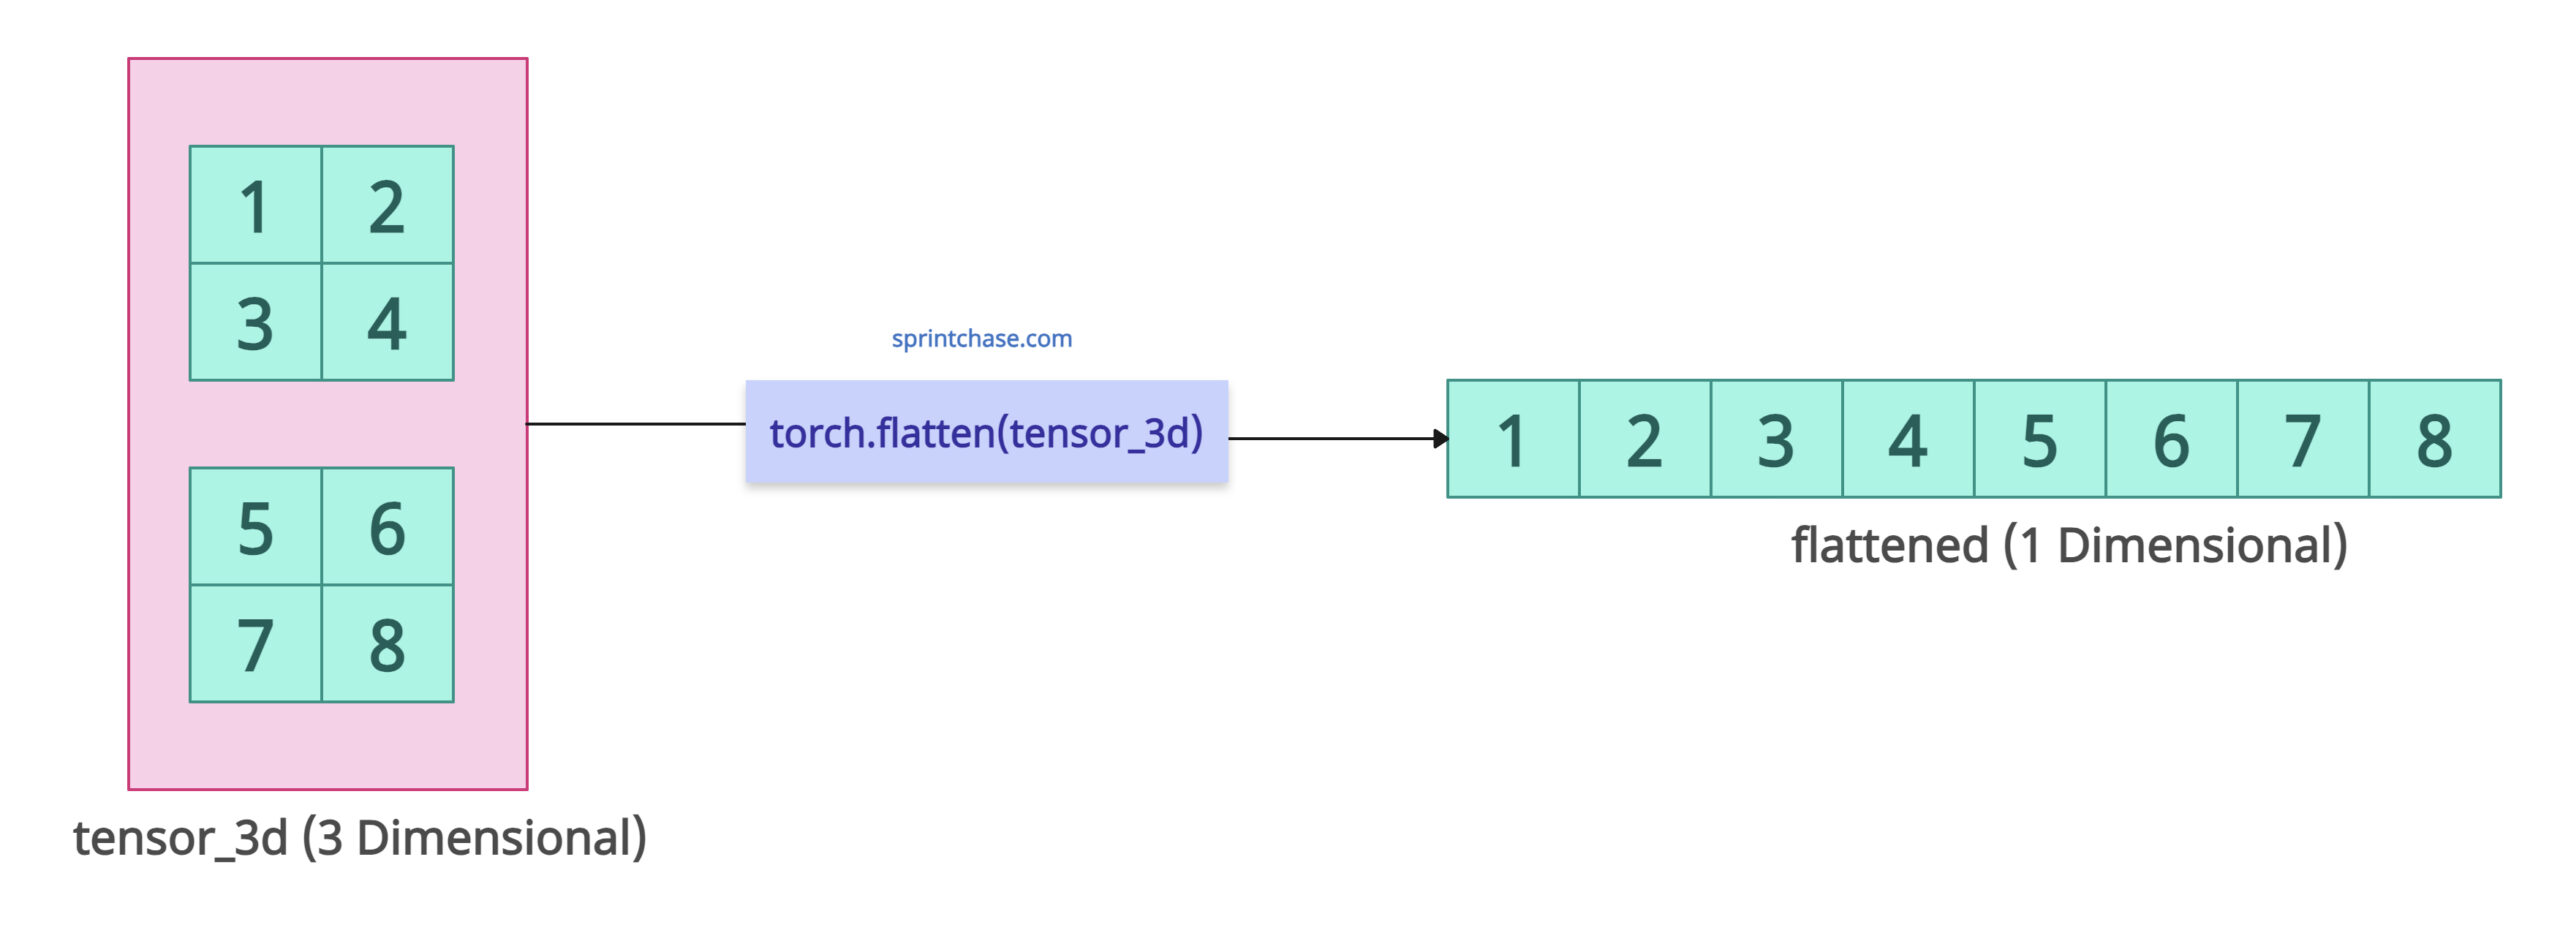

In [15]:
tensor_example = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7 ,8]]])
print(f"Original tensor:\n{tensor_example}")
print(f"Shape of original tensor: {tensor_example.shape}")

print('-'*20)
flattened_example = torch.flatten(tensor_example)
print(f"Flattened tensor:\n{flattened_example}")
print(f"Shape of flattened tensor: {flattened_example.shape}")

Original tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape of original tensor: torch.Size([2, 2, 2])
--------------------
Flattened tensor:
tensor([1, 2, 3, 4, 5, 6, 7, 8])
Shape of flattened tensor: torch.Size([8])


การสลับมิติ (Permutation)
\
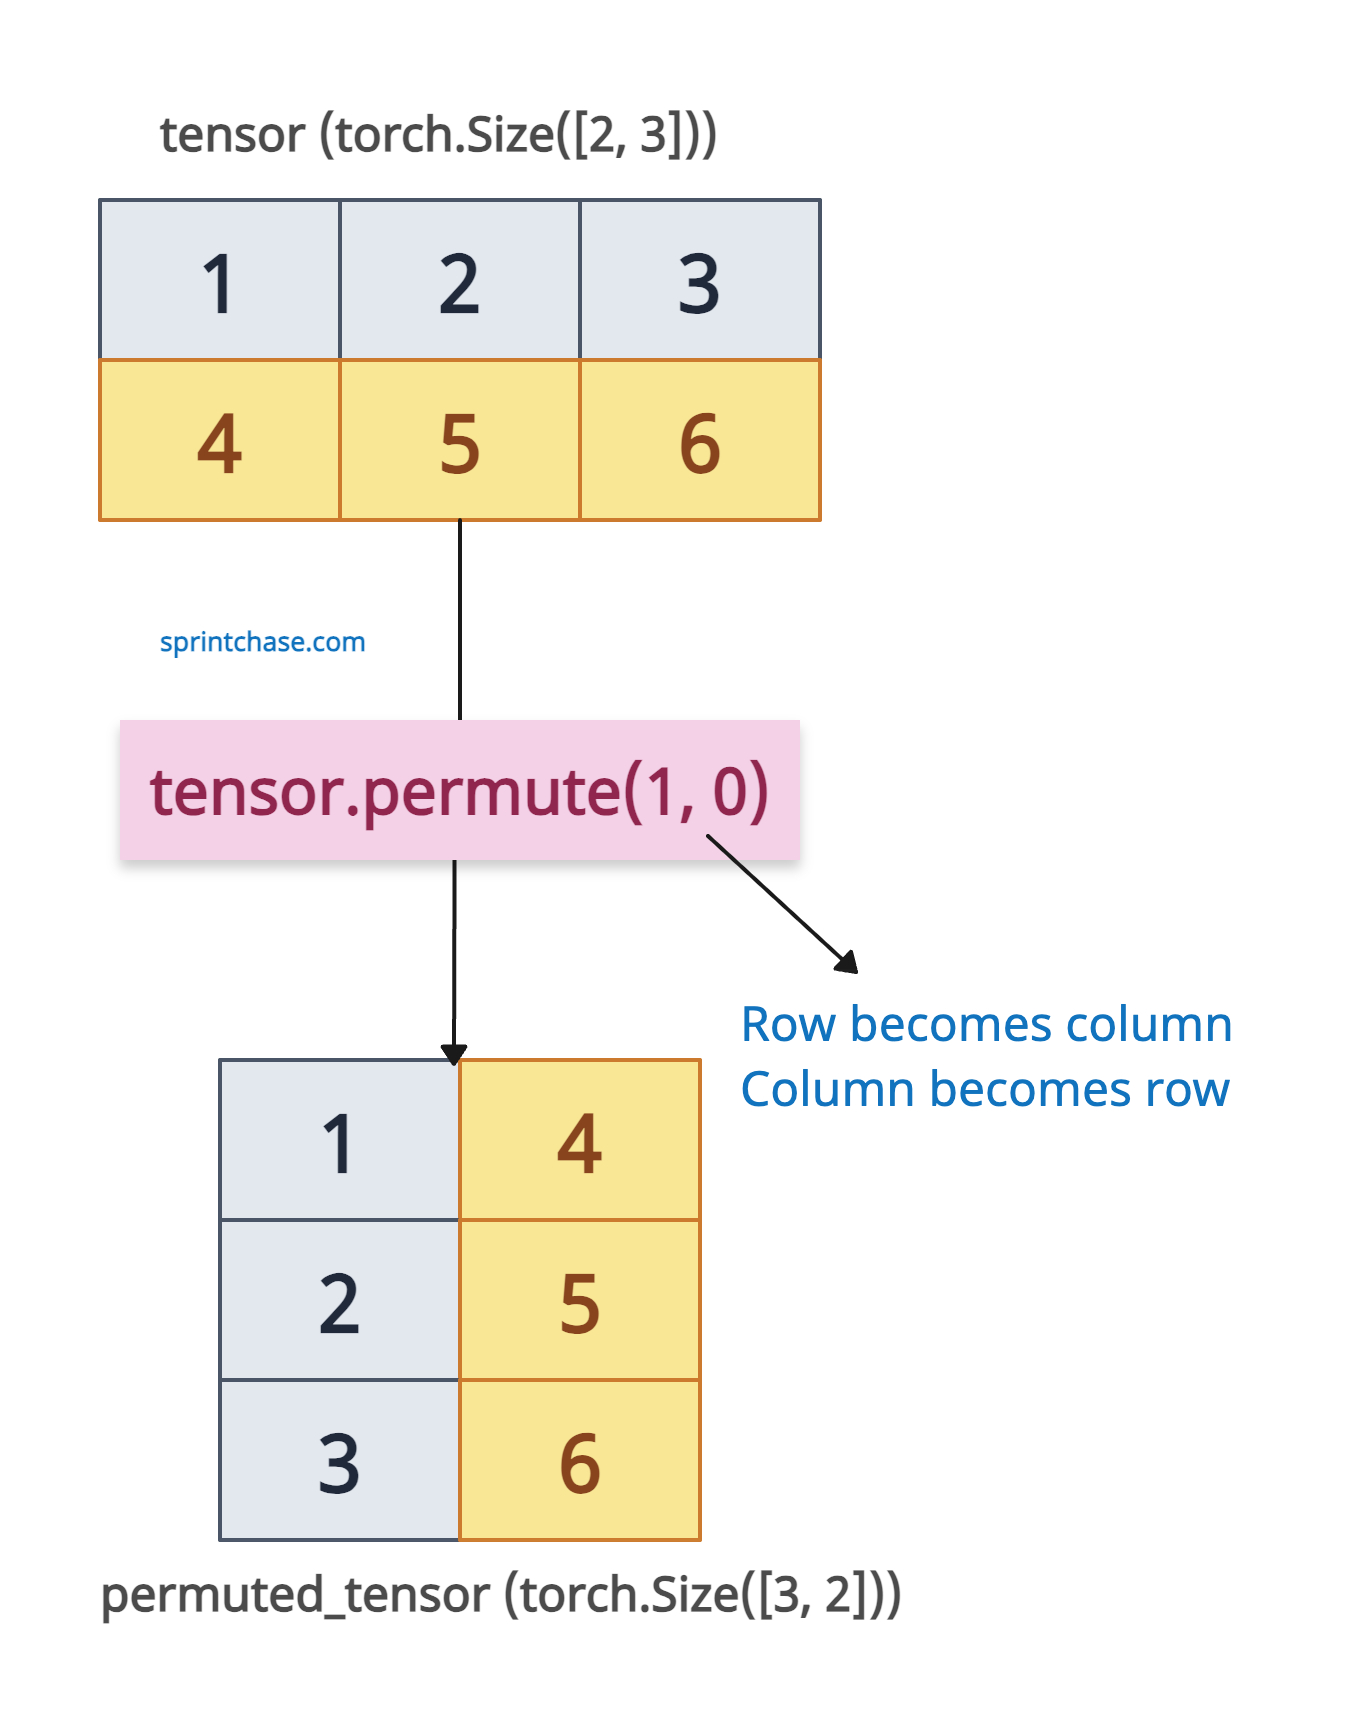

In [16]:
tensor_example = torch.tensor([[[1, 2], [3, 4], [5, 6]], [[7, 8], [9, 10], [11, 12]]])
print(f"Original tensor:\n{tensor_example}")
print(f"Shape of original tensor: {tensor_example.shape}")

print('-'*20)
tensor_permuted = tensor_example.permute(0, 2, 1)
print(f"Permuted tensor (Width-Height swapping):\n{tensor_permuted}")
print(f"Shape of permuted tensor (Width-Height swapping): {tensor_permuted.shape}")

tensor_permuted = tensor_example.permute(1, 0, 2)
print(f"Permuted tensor (Depth-Height swapping):\n{tensor_permuted}")
print(f"Shape of permuted tensor (Depth-Height swapping): {tensor_permuted.shape}")

tensor_permuted = tensor_example.permute(2, 1, 0)
print(f"Permuted tensor (Depth-Width swapping):\n{tensor_permuted}")
print(f"Shape of permuted tensor (Depth-Width swapping): {tensor_permuted.shape}")

Original tensor:
tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])
Shape of original tensor: torch.Size([2, 3, 2])
--------------------
Permuted tensor (Width-Height swapping):
tensor([[[ 1,  3,  5],
         [ 2,  4,  6]],

        [[ 7,  9, 11],
         [ 8, 10, 12]]])
Shape of permuted tensor (Width-Height swapping): torch.Size([2, 2, 3])
Permuted tensor (Depth-Height swapping):
tensor([[[ 1,  2],
         [ 7,  8]],

        [[ 3,  4],
         [ 9, 10]],

        [[ 5,  6],
         [11, 12]]])
Shape of permuted tensor (Depth-Height swapping): torch.Size([3, 2, 2])
Permuted tensor (Depth-Width swapping):
tensor([[[ 1,  7],
         [ 3,  9],
         [ 5, 11]],

        [[ 2,  8],
         [ 4, 10],
         [ 6, 12]]])
Shape of permuted tensor (Depth-Width swapping): torch.Size([2, 3, 2])


การคำนวณเชิง Tensor

In [17]:
# tensor1 = torch.rand(4,4)
# tensor2 = torch.rand(4,4)

tensor1 = torch.tensor([[1,2],[3,4]])
tensor2 = torch.tensor([[5,6],[7,8]])
print("T1: \n", tensor1, "\nT2: \n", tensor2)
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor1.mul(tensor2)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor1 * tensor2}")

T1: 
 tensor([[1, 2],
        [3, 4]]) 
T2: 
 tensor([[5, 6],
        [7, 8]])
tensor.mul(tensor) 
 tensor([[ 5, 12],
        [21, 32]]) 

tensor * tensor 
 tensor([[ 5, 12],
        [21, 32]])


In [18]:
tensor = torch.ones(4, 4)
tensor[1,] = 0
print(f"tensor.matmul(tensor) \n {tensor.matmul(tensor)} \n")
# Alternative syntax:
print(f"tensor @ tensor \n {tensor @ tensor}")

tensor.matmul(tensor) 
 tensor([[3., 3., 3., 3.],
        [0., 0., 0., 0.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor 
 tensor([[3., 3., 3., 3.],
        [0., 0., 0., 0.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [19]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.t())} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.t()}")

tensor.matmul(tensor.T) 
 tensor([[4., 0., 4., 4.],
        [0., 0., 0., 0.],
        [4., 0., 4., 4.],
        [4., 0., 4., 4.]]) 

tensor @ tensor.T 
 tensor([[4., 0., 4., 4.],
        [0., 0., 0., 0.],
        [4., 0., 4., 4.],
        [4., 0., 4., 4.]])


# HW1_2
1. จงเขียนโค้ดเพื่อให้ได้ผลลัพธ์ดังภาพ

```
tensor([[1., 2., 3., 4.],
        [2., 3., 4., 5.],
        [3., 4., 5., 6.],
        [4., 5., 6., 7.]])
```
โดยเริ่มต้นจาก
 tensor = torch.ones(4, 4)

In [20]:
tensor = torch.ones(4, 4)

for i in range(4):
    tensor[i, :] += i
for j in range(4):
    tensor[:, j] += j
print(tensor)

tensor([[1., 2., 3., 4.],
        [2., 3., 4., 5.],
        [3., 4., 5., 6.],
        [4., 5., 6., 7.]])



2. จงเขียนโค้ดเพื่อให้ได้ผลลัพธ์ดังภาพ

```
tensor([[1., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 4., 0.],
        [0., 0., 0., 0., 5.]])
```
โดยเริ่มต้นจาก
tensor = torch.zeros(5, 5)



In [21]:
tensor = torch.zeros(5, 5)
for i in range(5):
    tensor[i, i] = i + 1
print(tensor)

tensor([[1., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 4., 0.],
        [0., 0., 0., 0., 5.]])



3. จงเขียนโค้ดเพื่อให้ได้ผลลัพธ์ดังภาพ

```
tensor([[ 1.,  2.,  3.,  4.,  5.],
        [16., 17., 18., 19.,  6.],
        [15., 24., 25., 20.,  7.],
        [14., 23., 22., 21.,  8.],
        [13., 12., 11., 10.,  9.]])

```
โดยเริ่มต้นจาก
tensor = torch.zeros(5, 5)
* ใช้ loop ซ้อนกันเกิน 2 ชั้น

In [22]:
import torch

tensor = torch.zeros(5, 5)

n = 5
num = 1

# boundaries
top, bottom = 0, n - 1
left, right = 0, n - 1

while top <= bottom and left <= right:
    # top - left to right
    for j in range(left, right + 1):
        tensor[top][j] = num
        num += 1
    top += 1
    
    # right - top to bottom
    for i in range(top, bottom + 1):
        tensor[i][right] = num
        num += 1
    right -= 1
    
    # bottom - right to left
    if top <= bottom:
        for j in range(right, left - 1, -1):
            tensor[bottom][j] = num
            num += 1
        bottom -= 1
    
    # left - bottom to top
    if left <= right:
        for i in range(bottom, top - 1, -1):
            tensor[i][left] = num
            num += 1
        left += 1

print(tensor)


tensor([[ 1.,  2.,  3.,  4.,  5.],
        [16., 17., 18., 19.,  6.],
        [15., 24., 25., 20.,  7.],
        [14., 23., 22., 21.,  8.],
        [13., 12., 11., 10.,  9.]])


4. จงทำการขยายเทนเซอร์ที่มิติ 0 สลับเทนเซอร์ระหว่างมิติที่ 0 กับ 1 เชื่อมเทนเซอร์แบบเดิมที่มิติที่ 2 และการทำการคลี่ออกในตอนสุดท้าย ผลลัพธ์สุดท้ายและรูปทรงสุดท้ายเป็นอย่างไร?
```
Unsqueeze (dim=0) --> Permute[dim=0<-->dim=1] --> Concatenate (dim=2) --> Flatten
```
เทนเซอร์โจทย์
\
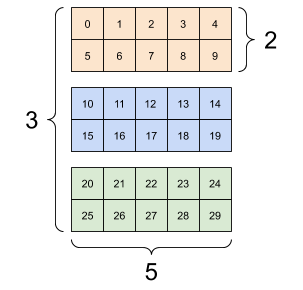

In [24]:
tensor = torch.arange(30).reshape(3, 2, 5)
print("Original tensor:")
print(tensor)
print(f"Shape: {tensor.shape}")
print()

# Step 1: Unsqueeze (dim=0)
step1 = torch.unsqueeze(tensor, dim=0)
print("Step 1: Unsqueeze (dim=0)")
print(step1)
print(f"Shape: {step1.shape}")
print()

# Step 2: Permute [dim=0<-->dim=1]
step2 = step1.permute(1, 0, 2, 3)
print("Step 2: Permute [dim=0<-->dim=1]")
print(step2)
print(f"Shape: {step2.shape}")
print()

# Step 3: Concatenate (dim=2)
step3 = torch.cat([step2, step2], dim=2)
print("Step 3: Concatenate (dim=2)")
print(step3)
print(f"Shape: {step3.shape}")
print()

# Step 4: Flatten
final_result = torch.flatten(step3)
print("Step 4: Flatten")
print(final_result)
print(f"Final shape: {final_result.shape}")
print()

print("=" * 50)
print()
print("Final Result:")
print(final_result)
print(f"Final Shape: {final_result.shape}")

Original tensor:
tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]])
Shape: torch.Size([3, 2, 5])

Step 1: Unsqueeze (dim=0)
tensor([[[[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9]],

         [[10, 11, 12, 13, 14],
          [15, 16, 17, 18, 19]],

         [[20, 21, 22, 23, 24],
          [25, 26, 27, 28, 29]]]])
Shape: torch.Size([1, 3, 2, 5])

Step 2: Permute [dim=0<-->dim=1]
tensor([[[[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9]]],


        [[[10, 11, 12, 13, 14],
          [15, 16, 17, 18, 19]]],


        [[[20, 21, 22, 23, 24],
          [25, 26, 27, 28, 29]]]])
Shape: torch.Size([3, 1, 2, 5])

Step 3: Concatenate (dim=2)
tensor([[[[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9],
          [ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9]]],


        [[[10, 11, 12, 13, 14],
          [15, 16, 17, 18, 19],
          